# Análsis Crediticio BankChurners

## Librerias

In [12]:
import pandas as pd
import numpy as np

import seaborn as sns   
from matplotlib import pyplot as plt
import missingno as msno

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings

## Importación de información

In [9]:
#Importación de base de dato
datos = pd.read_csv('data/BankChurners.csv')

#Se eliminan las variables de estimación de naive Bayes
datos.drop(columns = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2' ], inplace = True)
datos.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Análisis exploratorio

### Entendimiento del conjunto de datos

**Tabla de contenido**
| Variable                   | Tipo       | Descripción                                                                                              |
|----------------------------|------------|----------------------------------------------------------------------------------------------------------|
| CLIENTNUM                  | Numérico   | Identificador único del cliente titular de la cuenta.                                                    |
| Attrition_Flag             | Categórico | Si la cuenta está cerrada o no                                                                           |
| Customer_Age               | Numérico   | Variable demográfica - Edad del cliente en años.                                                         |
| Gender                     | Categórico | Variable demográfica - M=Masculino, F=Femenino.                                                          |
| Dependent_count            | Categórico | Variable demográfica - Número de dependientes.                                                           |
| Education_Level            | Categórico | Variable demográfica - Nivel educativo del titular de la cuenta (ejemplo: secundaria, universidad, etc.).|
| Marital_Status             | Categórico | Variable demográfica - Casado, Soltero, Divorciado, Desconocido.                                         |
| Income_Category            | Categórico | Variable demográfica - Categoría de ingresos anuales del titular (< $40K, $40K - 60K, $60K - $80K, $80K - $120K, >).|
| Card_Category              | Categórico | Variable de producto - Tipo de tarjeta (Blue, Silver, Gold, Platinum).                                   |
| Months_on_book             | Numérico   | Periodo de relación con el banco.                                                                        |
| Total_Relationship_Count   | Numérico   | Número total de productos que posee el cliente.                                                          |
| Months_Inactive_12_mon     | Numérico   | Número de meses inactivo en los últimos 12 meses.                                                        |
| Contacts_Count_12_mon      | Numérico   | Número de contactos en los últimos 12 meses.                                                             |
| Credit Limit               | Numérico   | Límite de crédito en la tarjeta de crédito.                                                              |
| Total_Resolving_Bal        | Numérico   | Saldo rotatorio total en la tarjeta de crédito.                                                          |
| Avg_Open_To_Buy            | Numérico   | Línea de crédito disponible (Promedio de los últimos 12 meses).                                          |
| Total_Amt_Chng_Q4_Q1       | Numérico   | Cambio en el monto de las transacciones (cuarto trimestre sobre el primer trimestre).                    |
| Total_Trans_Amt            | Numérico   | Monto total de transacciones (últimos 12 meses).                                                         |
| Total_Trans_Ct             | Numérico   | Número total de transacciones (últimos 12 meses).                                                        |
| Total_Ct_Chng_Q4_Q1        | Numérico   | Cambio en el número de transacciones (cuarto trimestre sobre el primer trimestre).                       |
| Avg_Utilization_Ratio      | Numérico   | Promedio de la tasa de utilización de la tarjeta.                                                        |


**Dimensionalidad**: El conjunto de datos cuenta con un total de 10.127 filas y 21 variables.

In [23]:
datos.shape

(10127, 21)

**Valores ausentes:** No se evidencian valores ausentes dentro del conjunto de datos.

<Axes: >

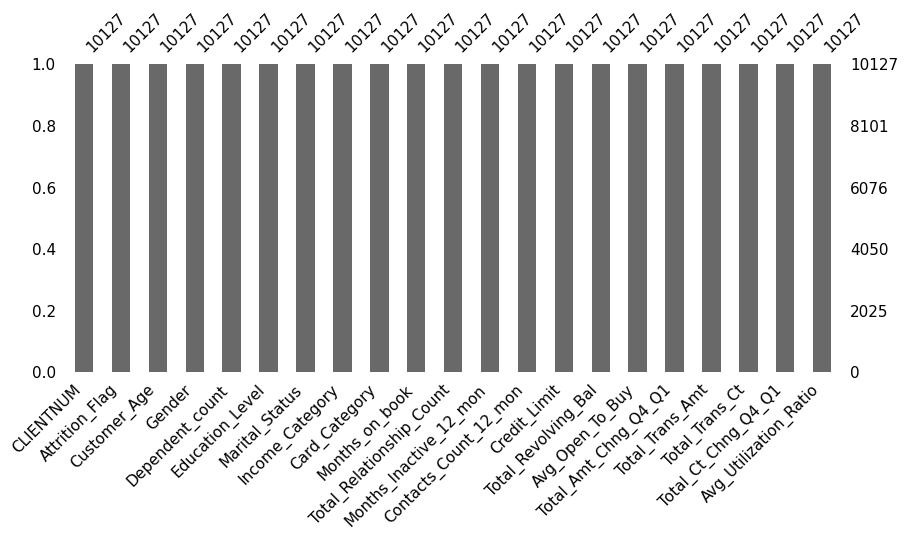

In [22]:
msno.bar(datos,figsize=(10,4), fontsize=11)

**Valores duplicados:** No existen clientes duplicados, con base en la columna ```CLIENTNUM``.

In [24]:
# Suma de la cantidad de valores duplicados en la columna CLIENTNUM
datos['CLIENTNUM'].duplicated().sum()

0

### Variables Categóricas

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


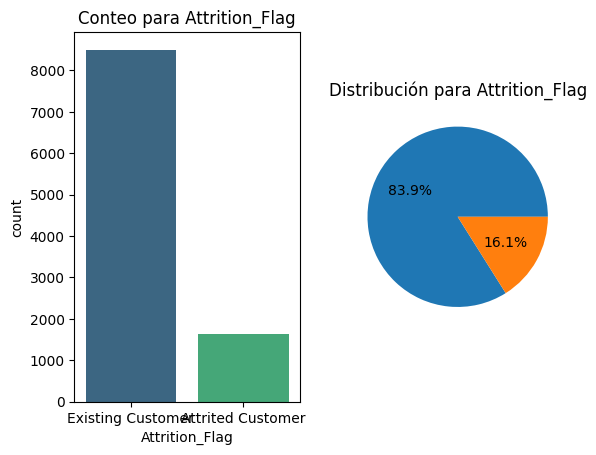

<Figure size 500x1000 with 0 Axes>

Gender
F    5358
M    4769
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


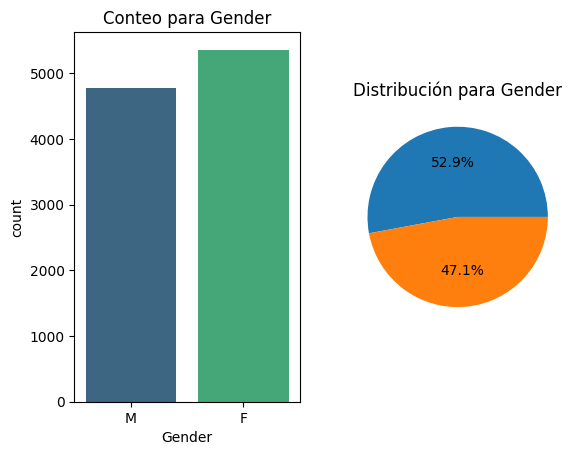

<Figure size 500x1000 with 0 Axes>

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


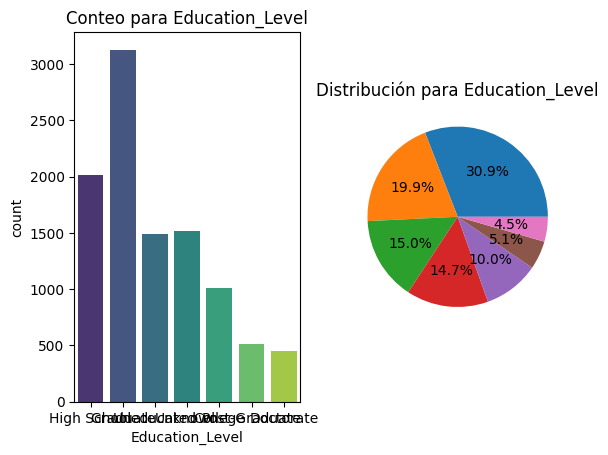

<Figure size 500x1000 with 0 Axes>

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


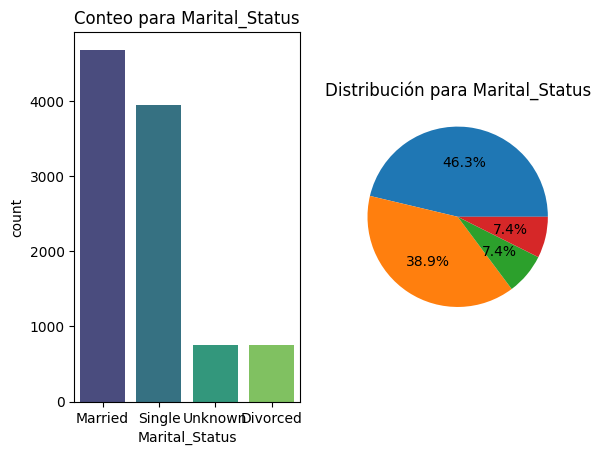

<Figure size 500x1000 with 0 Axes>

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


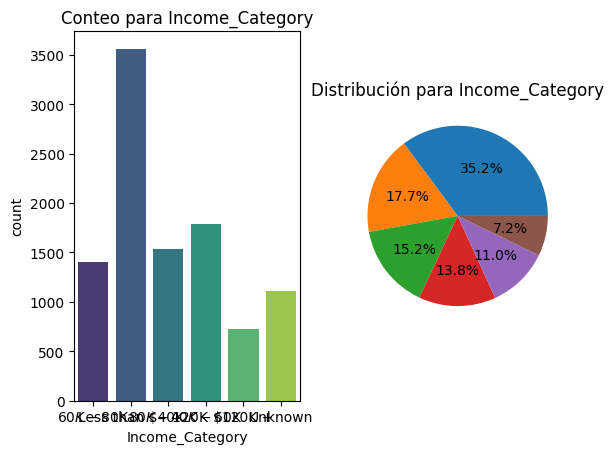

<Figure size 500x1000 with 0 Axes>

Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64 



C:\Users\dapen\AppData\Local\Temp\ipykernel_18248\2304089446.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0])


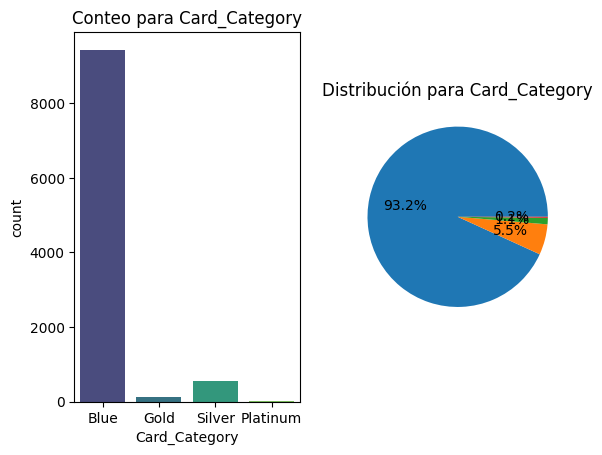

<Figure size 500x1000 with 0 Axes>

In [4]:
#Descripción de variables categóricas
for col in datos.columns:
    if datos[col].dtype == 'object':
        print(datos[col].value_counts() , "\n")

        fig, ax = plt.subplots(1,2)
        plt.figure(figsize=(5, 10)) 
        sns.countplot(x =col, data=datos, palette='viridis', ax=ax[0]) 
        ax[0].set_title(f'Conteo para {col}')

        ax[1].pie(datos[col].value_counts(),autopct='%1.1f%%')
        ax[1].set_title(f'Distribución para {col}')
        plt.show()  

        

In [5]:
pd.DataFrame(datos['Attrition_Flag'].value_counts() )

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [6]:
plt.figure(figsize=(5, 3)) 
sns.countplot(x =categoria, data=datos, palette='viridis') # Personalizar el gráfico plt.xlabel('Categoría') plt.ylabel('Conteo') plt.title('Conteo por Categoría') plt.show()
plt.title(f'Conteo para {categoria}')
plt.show()   
plt.bar()

NameError: name 'categoria' is not defined

<Figure size 500x300 with 0 Axes>

### Variables Continuas

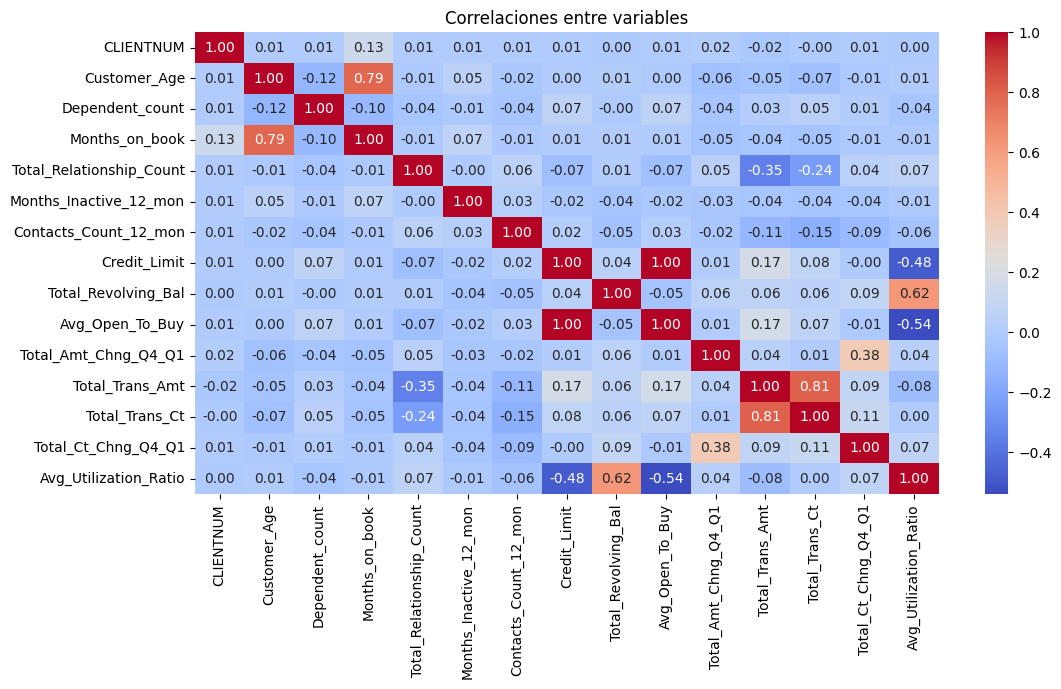

In [8]:
# Seleccionar solo columnas numéricas
numerical_data = datos.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
corr = numerical_data.corr()

# Crear el heatmap
plt.figure(figsize=[12, 6])
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlaciones entre variables')
plt.show()

La matriz de correlación revela una fuerte relación positiva entre ``Credit_Limit`` y``Avg_Open_To_Buy``, lo cual es esperable, ya que un mayor límite implica más crédito disponible. También muestra una correlación negativa levemente moderada entre ``Avg_Utilization_Ratio`` y ``Credit_Limit``-``Avg_Open_To_Buy``, sugiriendo que algunos de los clientes con límites de crédito altos tienden a usar una menor proporción de su crédito. Por ultimo, se evidencia una correlación positiva entre ``Avg_Utilization_Ratio`` y ```Total_Revolving_Bal``, mostando que las tarjetas de credito cuando se usan con más frecuencia se tiende a aumentar el saldo rotatorio.

In [22]:
import plotly.subplots as sp
import plotly.graph_objects as go

datos['Attrition_Flag'] = datos['Attrition_Flag'].astype(str)
categorical_columns = datos.select_dtypes(include=['object', 'category']).columns

# Crear una figura con subgráficas
num_cols = 2
num_rows = (len(categorical_columns) + num_cols - 1) // num_cols  # Calcula el número de filas necesarias

fig = sp.make_subplots(rows=num_rows, cols=num_cols, subplot_titles=categorical_columns)

# Añadir gráficos de barras a las subgráficas
for i, column in enumerate(categorical_columns):
    row = i // num_cols + 1
    col = i % num_cols + 1
    
    # Contar las ocurrencias de cada categoría por Attrition_Flag
    counts = datos.groupby([column, 'Attrition_Flag']).size().unstack(fill_value=0)
    
    if counts.shape[1] == 2:  # Verifica que hay dos categorías en Attrition_Flag
        # Iterar sobre las columnas y crear gráficos de barras
        for attrition_flag in counts.columns:
            fig.add_trace(go.Bar(x=counts.index, 
                                 y=counts[attrition_flag], 
                                 name=attrition_flag, 
                                 marker_color='blue' if attrition_flag == counts.columns[0] else 'green'),
                          row=row, col=col)
    else:
        # Si no hay ambas categorías, solo dibuja la que existe
        for attrition_flag in counts.columns:
            fig.add_trace(go.Bar(x=counts.index, 
                                 y=counts[attrition_flag], 
                                 name='Attrition_Flag ' + attrition_flag, 
                                 marker_color='blue' if attrition_flag == counts.columns[0] else 'green'),
                          row=row, col=col)

# Ajustar diseño
fig.update_layout(title_text='Distribución por Categoría según Attrition_Flag', 
                  barmode='stack', 
                  showlegend=True,
                  height=800)

# Mostrar el gráfico
fig.show()



In [9]:
# Asegúrate de que 'Attrition_Flag' sea de tipo categórico si no lo es
datos['Attrition_Flag'] = datos['Attrition_Flag'].astype(str)

# Crear el gráfico de dispersión
fig = px.scatter(datos, x='Months_on_book', y='Customer_Age',
                 color='Attrition_Flag',
                 title='Relación entre Months_on_book y Customer_Age',
                 labels={'Attrition_Flag': 'Estado de la Cuenta (0: Activa, 1: Cerrada)',
                         'Months_on_book': 'Meses en el Banco',
                         'Customer_Age': 'Edad del Cliente'},
                 color_discrete_map={'0': 'blue', '1': 'red'})  # Puedes elegir colores específicos

# Mostrar el gráfico
fig.show()


In [10]:
# Asegúrate de que 'Attrition_Flag' sea de tipo categórico si no lo es
datos['Attrition_Flag'] = datos['Attrition_Flag'].astype(str)

# Crear el gráfico de dispersión
fig = px.scatter(datos, x='Credit_Limit', y='Avg_Utilization_Ratio',
                 color='Attrition_Flag',
                 title='Relación entre Credit_Limit y Avg_Utilization_Ratio',
                 labels={'Attrition_Flag': 'Estado de la Cuenta (0: Activa, 1: Cerrada)',
                         'Credit_Limit': 'Límite de Crédito',
                         'Avg_Utilization_Ratio': 'Ratio de Utilización Promedio'},
                 color_discrete_map={'0': 'blue', '1': 'red'})  # Colores para cada estado

# Mostrar el gráfico
fig.show()
